## Measurement of Electricity Prices of a District given the total amount of Electricity using time series forecasting

### Data Set Information:

The archive contains 92,016 measurements of electricity data gathered between September 2010 and February 2021.

[Dataset](https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast)

### Load the Dataset

In [1]:
import pandas as pd

In [2]:
elect_data = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [4]:
elect_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


### Summary Statistics 

In [6]:
elect_data.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


### Exploratory Data Analysis

1. Check for Missing data

In [7]:
elect_data.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

No missing data

2. Type of Data

In [9]:
elect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


Mostly Numerical Data

3. Early Visualizations to gain Insights

In [11]:
from matplotlib import pyplot
import datetime




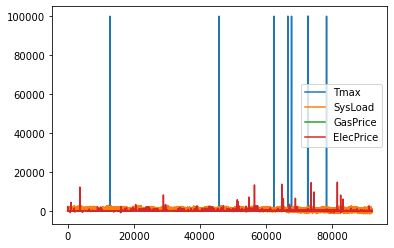

In [12]:
elect_data.plot()
pyplot.show()

automatically binned histogram

### Data Preparation

1. Convert the Fulltime column to a DateTime value

In [14]:
elect_data["FullDate"] = pd.to_datetime(elect_data["FullDate"])

Let's check the datatype

In [16]:
elect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


2. Make FullDate the index

In [18]:
elect_data.set_index("FullDate", inplace=True)

In [19]:
elect_data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


### Insights from the Data


1. ElecPrice

In [21]:
elect_data["ElecPrice"].max()

14700.0

Calculating Moving average

Text(0, 0.5, 'ElecPrice')

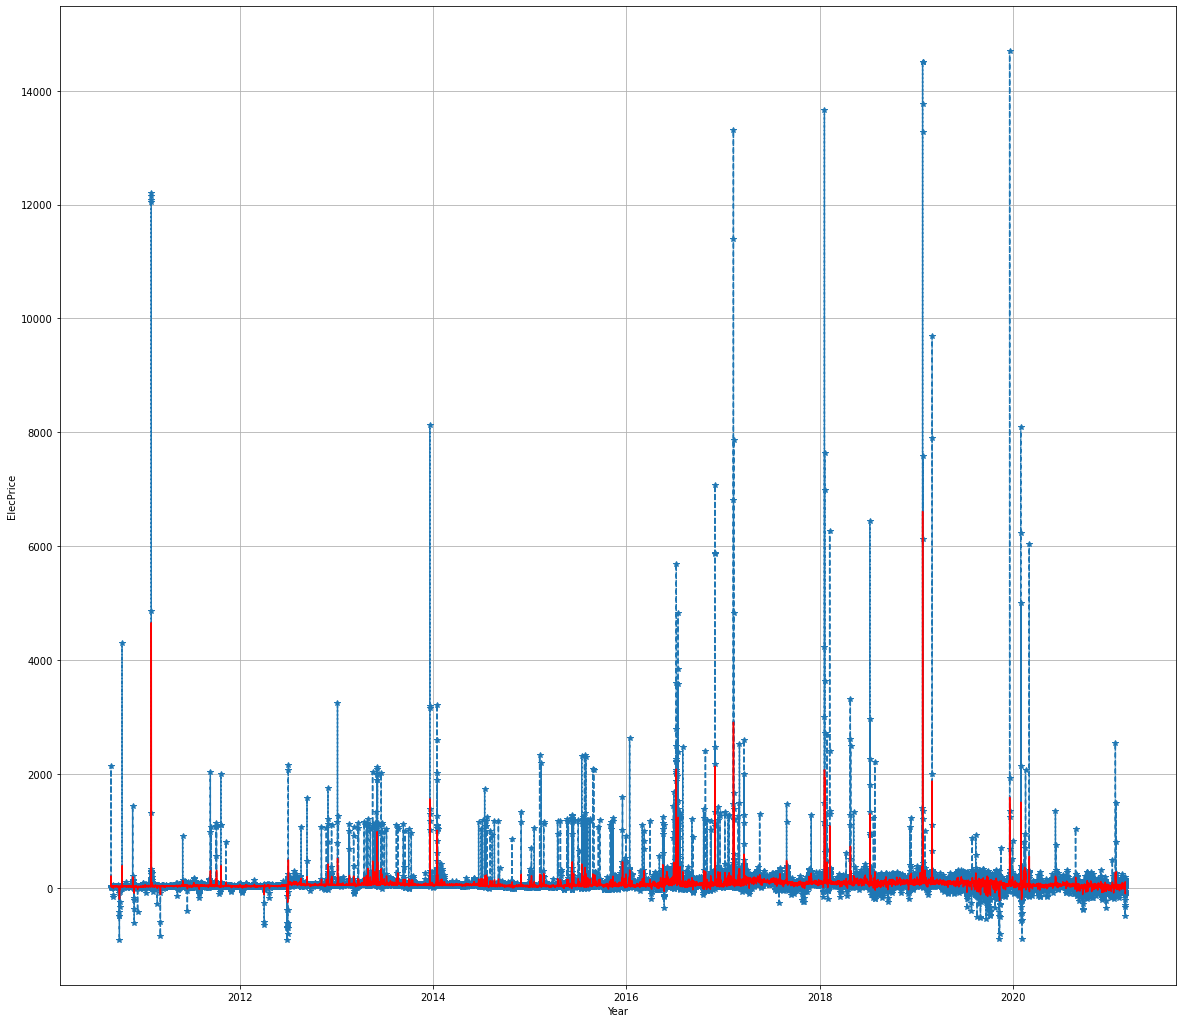

In [24]:
import matplotlib.pyplot as plt

MA = elect_data['ElecPrice'].rolling(12).mean()
plt.figure(figsize=(20,18))
plt.plot(elect_data.index, elect_data.ElecPrice, '--', marker='*' )
plt.plot(MA, color='red')
plt.grid()
plt.xlabel('Year')
plt.ylabel('ElecPrice')

We'll use statsmodels to extract relevant timeseries information from the data

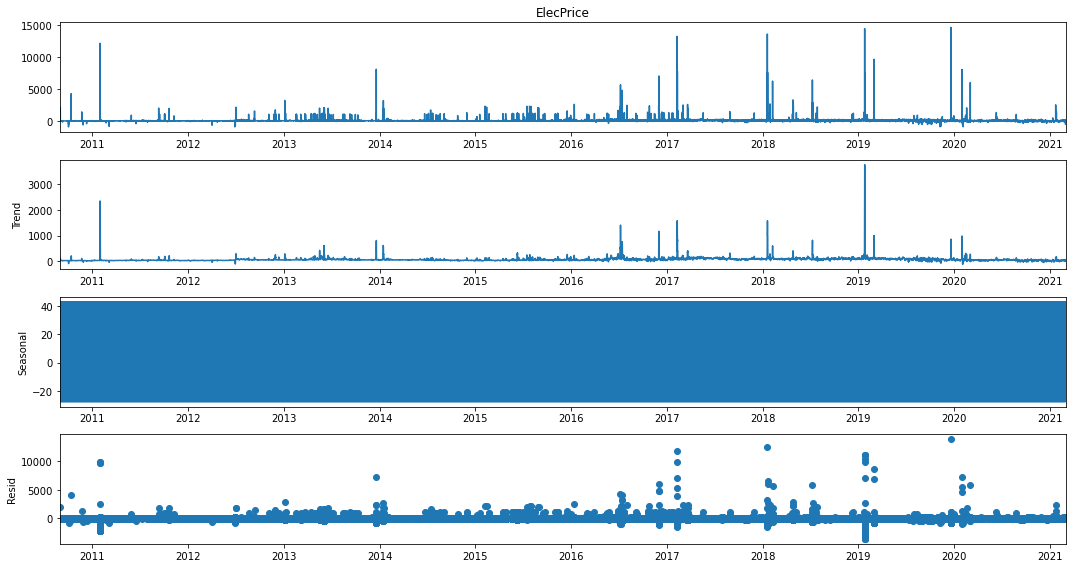

In [25]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8

decompose_series = sm.tsa.seasonal_decompose(elect_data['ElecPrice'], model='additive')
decompose_series.plot()
plt.show()

### Solutions to Questions

#### Question 11: 
Resample the data from an hour samplinng rate to a daily sampling rate (i.e sum over the hours for each day).  Which of the following is a plot of ElecPrice over time?

(The options are not shown here but the answer will be obtained)

In [28]:
#This is a downsampling

#Daily downsampling
daily_elect_data = elect_data.resample('D').sum()


#Quarterly Downsampling
quarterly_elect_data = elect_data.resample('3M').sum()

Let's view them

In [29]:
daily_elect_data.head(3)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38,88.56,2751.700
2010-09-02,369.6,38898.99,88.56,570.810
2010-09-03,439.2,41665.76,106.80,504.975


In [30]:
quarterly_elect_data.head(3)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-30,12172.8,1.136265e+06,2576.6376,18054.645
2010-12-31,53280.0,2.914292e+06,5541.6528,45872.860
2011-03-31,60626.4,2.622655e+06,7338.4752,113511.665


Finally, we display the downsample data

Text(0, 0.5, 'Electric Price')

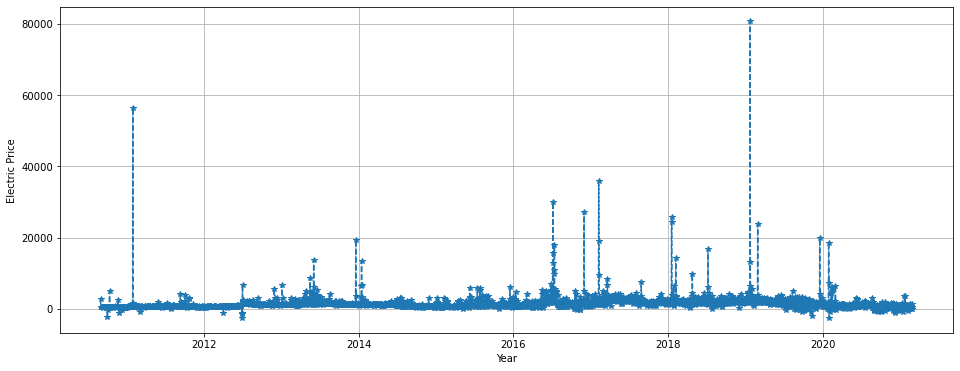

In [31]:
plt.figure(figsize=(16,6))
plt.plot(daily_elect_data.index, daily_elect_data['ElecPrice'],'--',marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Electric Price')

#### Question 12:

Using the Augmented Dicky Fuller Test (ADF), what is the P-value of the SysLoad and GasPrice of the sampled Dataset, to 6 decimal places?

We'll define a helper function to display the information of ADF test



In [32]:
def show_adf_test(adfull):
    """
    Displays the Augmented Dicky Fuller Test results ie.
    ADF Statistic,p-value, No. of lags used,
    No. of observations used and Critical Values
    """
    print(f'ADF Statistic: {adfull[0]}')
    print(f'p-value: {adfull[1]}')
    print(f'No. of lags used: {adfull[2]}')
    print(f'No. of observations used : {adfull[3]}')
    print('Critical Values:')
    for k, v in adfull[4].items():
        print(f' {k}: {v}')
    

In [39]:
from statsmodels.tsa.stattools import adfuller
sys_adf_result = adfuller(daily_elect_data['SysLoad'])
gas_adf_result = adfuller(daily_elect_data['GasPrice'])
elec_adf_result = adfuller(daily_elect_data['ElecPrice'])

In [34]:
show_adf_test(sys_adf_result)

ADF Statistic: -3.6901589888366484
p-value: 0.0042537255045740855
No. of lags used: 30
No. of observations used : 3803
Critical Values:
 1%: -3.432070672988693
 5%: -2.8623002987378547
 10%: -2.567174716967499


In [36]:
sys_adf = sys_adf_result[1]
round(sys_adf,6)

0.004254

In [38]:
show_adf_test(gas_adf_result)

ADF Statistic: -2.902766697165178
p-value: 0.04502721288462563
No. of lags used: 27
No. of observations used : 3806
Critical Values:
 1%: -3.4320693157877544
 5%: -2.8622996992165364
 10%: -2.5671743978048323


In [41]:
gas_adf = gas_adf_result[1]
round(gas_adf,6)

0.045027

In [43]:
show_adf_test(elec_adf_result)

ADF Statistic: -8.269053866873815
p-value: 4.848817773711248e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
 1%: -3.432066157296446
 5%: -2.8622983040036005
 10%: -2.5671736550459663


In [46]:
elect_adf = elec_adf_result[1]
round(elect_adf,6)

0.0

#### Question 14: 

Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of the GasPrice and ElctPrice of the resampled Dataset, to 4 decimal places?

In [47]:
round(gas_adf_result[4]["5%"],4)

-2.8623

In [48]:
round(gas_adf_result[4]["10%"],4)

-2.5672

In [49]:
round(elec_adf_result[4]["5%"],4)

-2.8623

In [50]:
round(elec_adf_result[4]["10%"],4)

-2.5672